> Trabajo: "Creacion del mapa topologico # 4"  
> Autor: Sergio Jacobo Zavaleta

In [10]:
from robots_moviles.topology_library import TopologicalMapProcessor, LinearTopologyOptimizer, GraphIO
import os
from pathlib import Path

#### Parametros

In [ ]:
BASE_DIR = Path(os.getcwd())
MAP_DIR = BASE_DIR.parent / 'maps' / 'escenario_4.yaml'
RESULT_DIR = 'results/topologico/optimized'
MAP_NUMBER = '4'
GRAPH_DIR = f"{RESULT_DIR}/grafo_optimizado_{MAP_NUMBER}.json.gz"
GRAPH_IMAGE_DIR = f"{RESULT_DIR}/mapa_grafo_optimized_escenario_{MAP_NUMBER}.png"
REPORT_DETAILED_DIR = f"{RESULT_DIR}/grafo_optimizado_detallado_escenario_{MAP_NUMBER}.csv"
REPORT_SIMPLE_DIR = f"{RESULT_DIR}/grafo_optimizado_simple_escenario_{MAP_NUMBER}.csv"
REPORT_SUMMARY_DIR = f"{RESULT_DIR}/grafo_optimizado_resumen_escenario_{MAP_NUMBER}"

#### Crecion del mapa topologico

Primer píxel blanco (esquina casa) en píxeles: (116, 67)


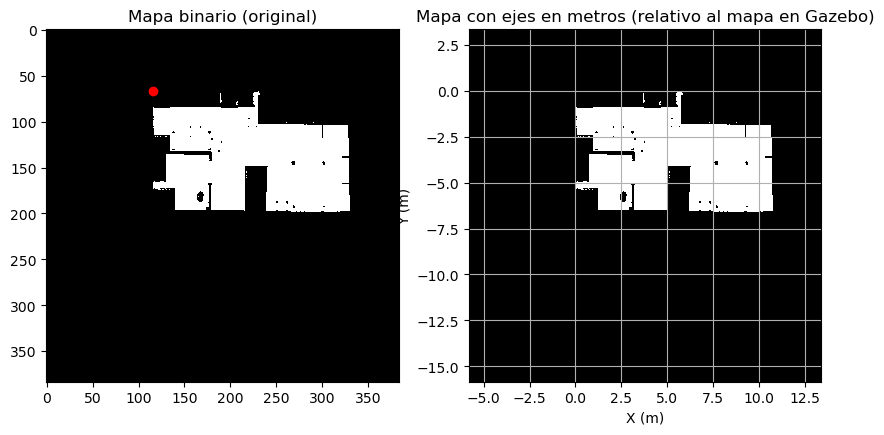

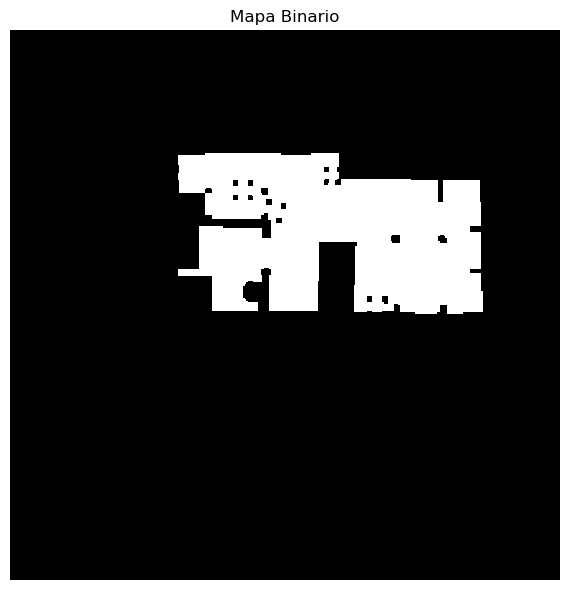

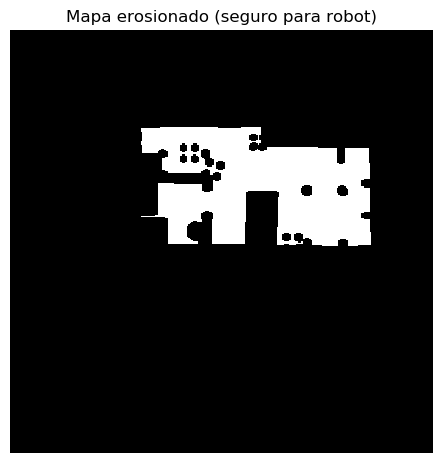

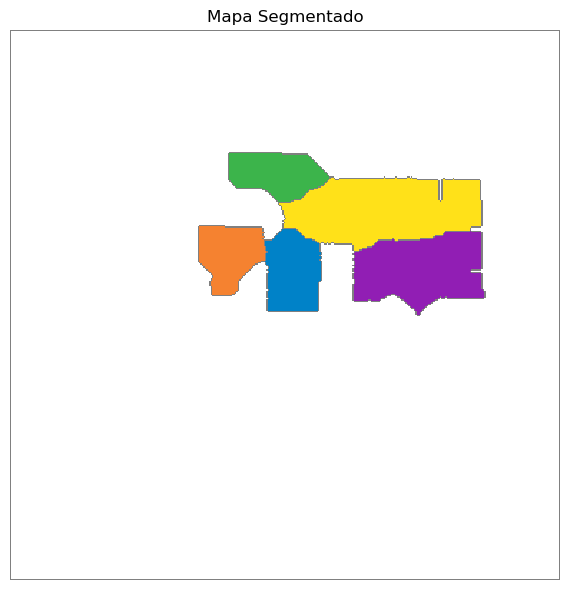

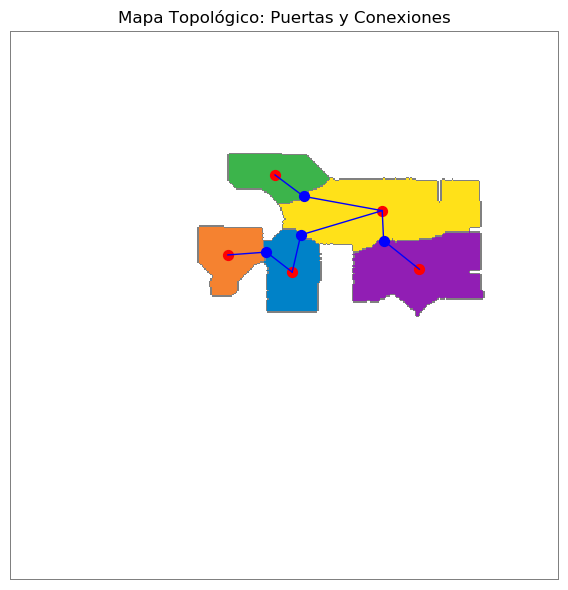

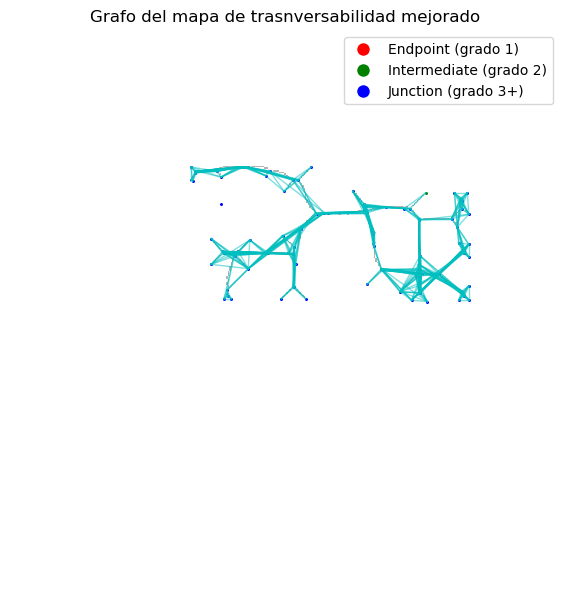

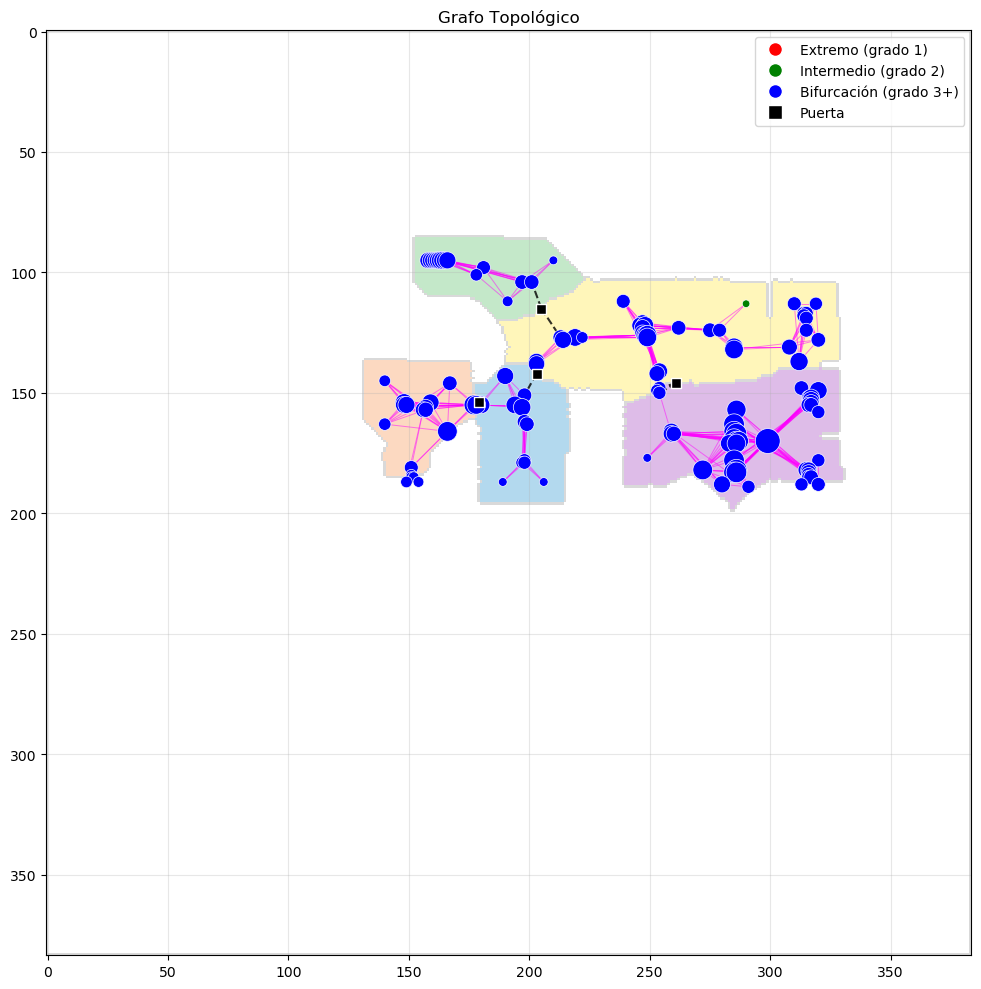

In [3]:
# Configuración de parámetros
config = TopologicalMapProcessor.Config()
# load_and_process_map
config.morph_open_kernel = (7, 7)  # Kernel más grande para menos ruido
config.erode_kernel = (3, 3)  # Erosión más fuerte
config.erode_iterations = 1  # Más erosión para menos ruido
# Erosión considerando el tamaño del robot
config.robot_diametro = 0.3         # Diámetro del robot en metros
config.dilate_robot_iterations = 1   # Iteraciones para dilatación del robot
# segment_map
config.watershed_threshold = 0.6  # Umbral más alto para menos segmentos
config.dilate_iterations = 4  # Menos dilatación para menos segmentos
# extract_voronoi_nodes
config.skeleton_erode_kernel = (13, 13)  # Esqueleto más grueso
# is curvature point
config.curvature_threshold = 0.3  # Umbral de curvatura más alto
# add_strategic_nodes
config.strategic_node_step = 13  # Paso más pequeño para nodos estratégicos
# are nodes connected by skeleton
config.max_gap = 14  # Mayor tolerancia a huecos si existe ruido en el esqueleto
# has direct connection skeleton
config.max_gap_door = 20  # Mayor tolerancia a huecos para puertas que nodos
# build_topological_graph
config.door_connection_threshold = 200  # Menor distancia para conectar puertas
# visualize_sleleton_graph
config.skeleton_node_size = 10  # Nodos más grandes
config.skeleton_line_width = 1  # Líneas más gruesas
config.skeleton_node_size = 10  # Nodos más grandes
# visualize_graph
config.graph_node_size_base = 10  # Tamaño base de nodos más grande
config.graph_node_size_factor = 10 # Factor de tamaño por grado
config.door_node_size = 50  # Tamaño de nodos puerta más grande

# Crear instancia topologica
processor = TopologicalMapProcessor(MAP_DIR,config=config)

# Procesamiento completo
processor.load_and_process_map(f"{RESULT_DIR}/mapa_binario_escenario_{MAP_NUMBER}.png")
processor.segment_map(f"{RESULT_DIR}/mapa_segmentado_escenario_{MAP_NUMBER}.png")
processor.extract_topological_info(f"{RESULT_DIR}/mapa_topologico_escenario_{MAP_NUMBER}.png")
processor.extract_voronoi_nodes(f"{RESULT_DIR}/mapa_transversabilidad_escenario_{MAP_NUMBER}.png")
processor.build_topological_graph()

# Resultados
processor.visualize_graph(f"{RESULT_DIR}/mapa_grafo_escenario_{MAP_NUMBER}.png")

Mostrar reportes

In [ ]:
node_report = processor.generate_detailed_node_report(output_file=REPORT_DETAILED_DIR)
region_summary = processor.generate_region_summary(output_file=REPORT_SUMMARY_DIR)

Datos de regiones guardados en: results/topologico/optimized/grafo_optimizado_resumen_escenario_4_regions_20250510_191004.csv
Datos generales guardados en: results/topologico/optimized/grafo_optimizado_resumen_escenario_4_general_20250510_191004.csv

Estructura del grafo:
Regiones: 5
Puertas: 4
Nodos: 123
Conexiones internas: 615
Conexiones a puertas: 8


In [7]:
print("=== Reporte Detallado de Nodos ===")
print(node_report[node_report["region"] == 2])

=== Reporte Detallado de Nodos ===
    node_id      type    x    y   x_m   y_m region  degree  \
0     R2_N1  junction  210   95  4.70 -1.40      2       3   
1     R2_N5  junction  181   98  3.25 -1.55      2       9   
2     R2_N7  junction  178  101  3.10 -1.70      2       7   
3    R2_N10  junction  197  104  4.05 -1.85      2      10   
4    R2_N11  junction  201  104  4.25 -1.85      2      10   
5    R2_N13  junction  191  112  3.75 -2.25      2       5   
6   R2_N116  junction  158   95  2.10 -1.40      2      13   
7   R2_N117  junction  159   95  2.15 -1.40      2      13   
8   R2_N118  junction  160   95  2.20 -1.40      2      13   
9   R2_N119  junction  161   95  2.25 -1.40      2      13   
10  R2_N120  junction  162   95  2.30 -1.40      2      14   
11  R2_N121  junction  163   95  2.35 -1.40      2      15   
12  R2_N122  junction  164   95  2.40 -1.40      2      15   
13  R2_N123  junction  165   95  2.45 -1.40      2      14   
14  R2_N124  junction  166   95  2.

In [6]:
print("\n=== Resumen por Región ===")
print(region_summary)


=== Resumen por Región ===
   region_id  num_nodes  avg_degree  num_endpoints  num_junctions  \
0          2         15   11.200000              0             15   
1          3         36   11.250000              0             35   
2          4         13   10.230769              0             13   
3          5         19   10.789474              0             19   
4          6         40   14.175000              0             40   

   num_intermediate associated_doors    centroid  
0                 0               D0  (185, 100)  
1                 1       D0, D1, D2  (260, 125)  
2                 0           D1, D3  (197, 168)  
3                 0               D3  (152, 156)  
4                 0               D2  (286, 166)  


In [12]:
# Después de haber procesado el mapa y generado el esqueleto
simple_report = processor.generate_simple_skeleton_report(output_file=REPORT_SIMPLE_DIR)

# Acceder a los datos
print("=== Nodos del esqueleto ===")
print(simple_report["nodes"][simple_report["nodes"]["region"] == 2])

print("\n=== Conexiones del esqueleto ===")
print(simple_report["connections"][simple_report["connections"]["node1"] == 2])

=== Nodos del esqueleto ===
    node_id    x    y      type  degree region
1       105  158   95  junction      13      2
2       106  159   95  junction      13      2
3       107  160   95  junction      13      2
4       108  161   95  junction      13      2
5       109  162   95  junction      14      2
6       110  163   95  junction      16      2
7       111  164   95  junction      16      2
8       112  165   95  junction      15      2
9       113  166   95  junction      15      2
10        1  210   95  junction       5      2
14        5  181   98  junction      11      2
16        7  178  101  junction       7      2
18        9  196  103  junction      11      2
19       10  197  103  junction      12      2
20       11  196  104  junction       8      2
21       12  201  104  junction      11      2
23       14  191  112  junction       7      2

=== Conexiones del esqueleto ===
     node1  node2  distance  same_region
103      2      3   1.00 px         True
104      2

#### Grafo optimizado: Lineal

In [8]:
# Uso de la clase LinearTopologyOptimizer
original_graph = processor.graph

# Configuración
config = LinearTopologyOptimizer.Config()
config.keep_doors=True          # Siempre mantener nodos puerta
config.keep_endpoints=True      # Mantener nodos finales
config.min_node_degree=2        # Nodos con grado >= 2
config.connection_radius=30.0   # Radio de conexión ajustado
config.min_path_length=2        # Caminos de al menos 3 nodos
config.merge_aligned_nodes=True # Fusionar nodos alineados
config.alignment_tolerance=10.0 # Tolerancia de 10 grados
config.min_line_length=20.0     # Líneas de al menos 40px
config.max_merge_distance=10.0   # Fusionar nodos a <15px


# Optimización
linear_optimizer = LinearTopologyOptimizer(original_graph, config)
linear_graph = linear_optimizer.optimize()

# Verificación
print(f"Nodos: {len(linear_graph['nodes'])}")
print(f"Conexiones: {len(linear_graph['edges'])}")

Nodos: 40
Conexiones: 45


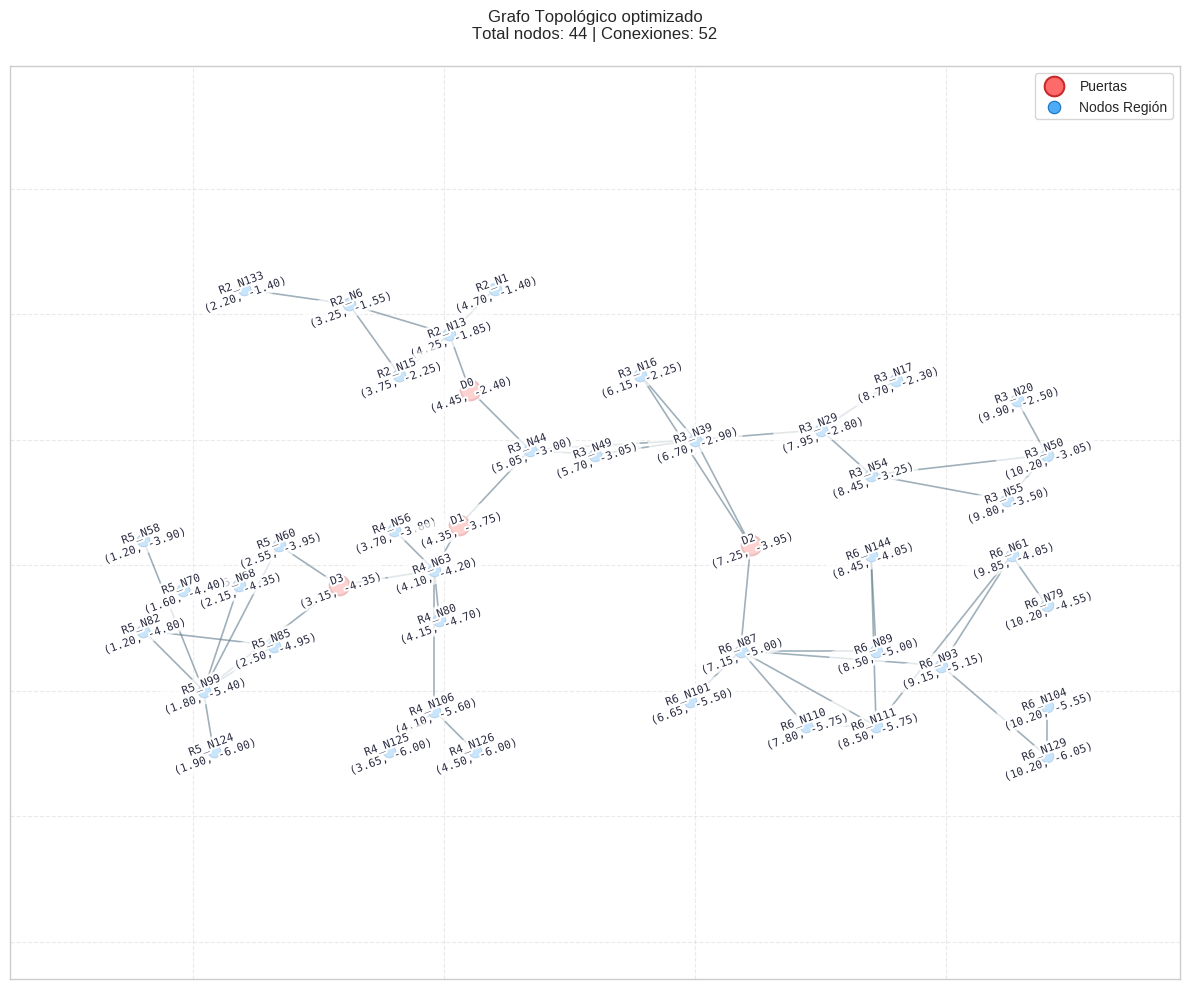

In [ ]:
# Crear instancia de GraphIO
graph_io = GraphIO()
graph_io.visualize_graph(linear_graph,path=GRAPH_IMAGE_DIR)

In [ ]:
# Guardar grafo optimizado
graph_io.save_graph(linear_graph, file_path=GRAPH_DIR)

# Opcional (para máxima compatibilidad con objetos Python)
# graph_io.save_graph_pickle(linear_graph, f"results/topologico/optimized/grafo_optimizado_{MAP_NUMBER}.pkl")